# Algoritmi Avanzati, 11.03.2019
---

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### EXERCISE 8
Given the two spirals dataset CSV file, create a 2-dimensional scatter plot of the spirals, using a different color for each spiral. Then apply the k-nearest neighbors algorithm to all the elements of the dataset using k $\in$ {3, 5, 10} and compute precision, accuracy and recall.

TIPS:
* consider spiral 1 as the positive class
* when evaluating, do not include the point you are predicting in the neighbors (this would be cheating)

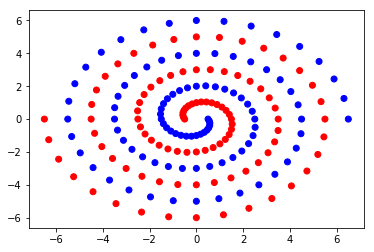

In [2]:
spirals = pd.read_csv("Datasets/spirals_density1.csv")

colors = ['red' if p == 0 else 'blue' for p in spirals['pattern']]
plt.scatter(spirals['x'], spirals['y'], color=colors)
plt.show()

In [3]:
def knn(point, n):
    distances = []
    correct_class = None

    for i, p in spirals.iterrows():
        if point[0] == p[0] and point[1] == p[1]:
            correct_class = p[2]
            continue
        
        dist = np.sqrt((point[0] - p[0])**2 + (point[1] - p[1])**2)
        distances.append((dist, p[2]))

    distances.sort(key=lambda x: x[0])
    
    counts = {}
    
    for d, label in distances[:n]:
        if label not in counts:
            counts[label] = 1
        else:
            counts[label] += 1

    return {
        'prediction': max(counts.items(), key=lambda x: x[1])[0],
        'correct_class': correct_class
    }

**KNN with $k \in \{3, 5, 10\}$**

In [4]:
positive_class = 1

for k in [3, 5, 10]:
    print("\nKNN with k =", k)
    
    true_p, false_p, true_n, false_n = 0, 0, 0, 0

    for i, p in spirals.iterrows():
        x = knn(p, k)

        if x['prediction'] == positive_class:
            if x['correct_class'] == positive_class:
                true_p += 1
            else:
                false_p += 1
        else:
            if x['correct_class'] == positive_class:
                false_n += 1
            else:
                true_n += 1
            
    print("    Precision: {:.4f}".format(true_p/(true_p + false_p)))
    print("    Accuracy:  {:.4f}".format((true_p + true_n)/(true_p + true_n + false_p + false_n)))
    print("    Recall:    {:.4f}".format(true_p/(true_p + false_n)))



KNN with k = 3
    Precision: 0.9072
    Accuracy:  0.9072
    Recall:    0.9072

KNN with k = 5
    Precision: 0.3608
    Accuracy:  0.3608
    Recall:    0.3608

KNN with k = 10
    Precision: 0.3918
    Accuracy:  0.3918
    Recall:    0.3918


---
### EXERCISE 9
Given the iris dataset CSV file, apply the k-nearest neighbors algorithm to all the elements of the dataset using $k \in \{3, 5, 10, 20\}$ and build the confusion matrix. Using the confusion matrix, compute total precision, total accuracy and total recall.

TIPS:

* total metrics correspond to the average of the relative metric computed on the elements of each class
* when evaluating, do not include the point you are predicting in the neighbors (this would be cheating)

In [5]:
iris = pd.read_csv("Datasets/iris.data", names=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Label"])
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
def knn(new_flower, n):
    distances = []
    correct_class = None

    for i, f in iris.iterrows():
        if (new_flower == f).all():
            correct_class = f[4]
            continue
        
        tmp = [(new_flower[i] - f[i])**2 for i in range(4)]
        dist = np.sqrt(sum(tmp))
        distances.append((dist, f[4]))

    distances.sort(key=lambda x: x[0])


    counts = {}
    
    for d, l in distances[:n]: # (distance, label)
        if l not in counts:
            counts[l] = 1
        else:
            counts[l] += 1
        
    return {
        'prediction': max(counts.items(), key=lambda x: x[1])[0],
        'correct_class': correct_class
    }

**KNN with $k \in \{3, 5, 10, 20\}$**

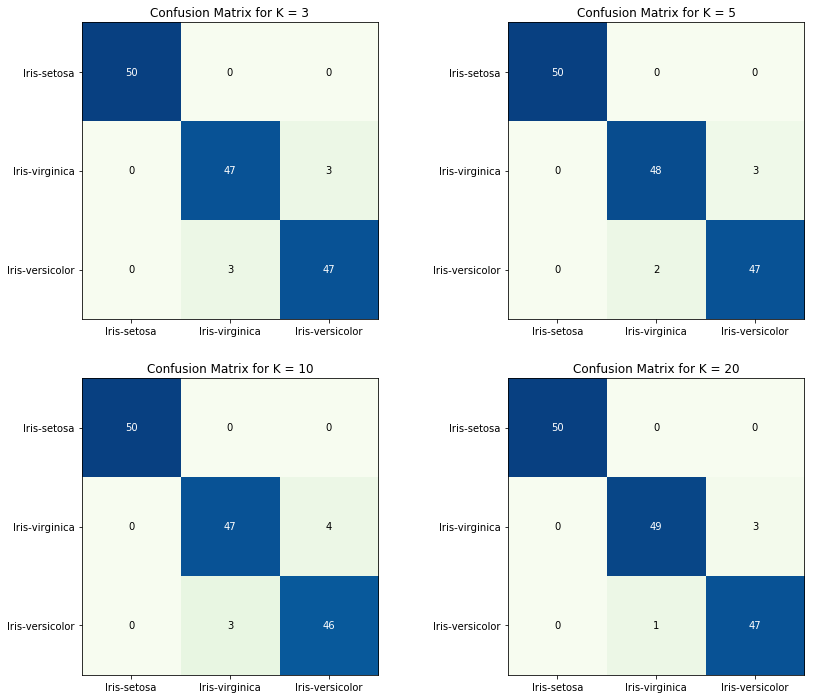

In [7]:
def l2i(label):
    return {
        'Iris-setosa': 0,
        'Iris-virginica': 1,
        'Iris-versicolor': 2
    }[label]


fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for i, k in enumerate([3, 5, 10, 20]):
    confusion_matrix = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
    
    for _, f in iris.iterrows():
        x = knn(f, k)
            
        confusion_matrix[l2i(x['correct_class'])][l2i(x['prediction'])] += 1
    
    axes[i//2][i%2].set_title("Confusion Matrix for K = " + str(k))
    axes[i//2][i%2].set_xticks([0, 1, 2])
    axes[i//2][i%2].set_yticks([0, 1, 2])
    axes[i//2][i%2].set_xticklabels(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'])
    axes[i//2][i%2].set_yticklabels(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'])
    axes[i//2][i%2].imshow(confusion_matrix, cmap=plt.get_cmap('GnBu'))

    for x in range(len(confusion_matrix)):
        for y in range(len(confusion_matrix)):
            c = 'k' if confusion_matrix[x][y] < 25 else 'w'
            axes[i//2][i%2].text(x, y, confusion_matrix[x][y], color=c, ha='center', va='center')

plt.show()

---
### EXERCISE 10
Given the iris dataset, create 3-d scatter plots in order to plot two dimensions of the points against one of the other two numerical dimensions (remember exercise 7? Choose the pair of dimensions you consider to be most suitable for applying k-nearest neighbors). Explore the two plots; do you see any relevant difference?

Then, create a function to predict the value of the third dimensions using the weighted k-neighbors algorithm. Apply the algorithm to all the elements of the dataset using k = {3, 5, 10} and compute the root mean square (RMS) error.

TIPS:
* to explore the plots, remember from the Spider tutorial that you can use `%matplotlib qt` and `%matplotlib inline` commands to switch between interactive and inline visualization modes
* when evaluating, do not include the point you are predicting in the neighbors (this would be cheating)

In [8]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

iris = pd.read_csv("Datasets/iris.data", names=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Label"])
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**X = PetalLength, Y = PetalWidth**

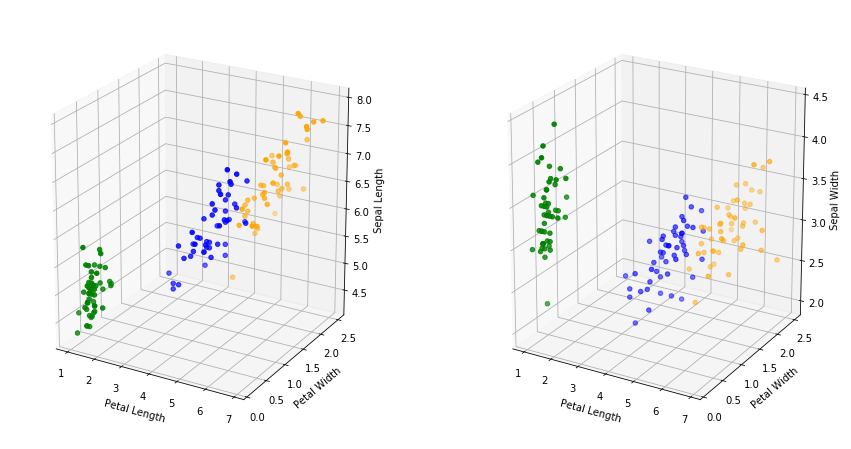

In [9]:
fig = plt.figure(figsize=(15, 8))
col_map = {'Iris-virginica': 'orange', 'Iris-versicolor': 'blue', 'Iris-setosa': 'green'}
colors = [col_map[l] for l in iris['Label']]


# Z: SepalLength
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_zlabel("Sepal Length")
ax.scatter(iris['PetalLength'], iris['PetalWidth'], iris['SepalLength'], color=colors)
ax.view_init(20, 300)

# Z: SepalWidth
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_zlabel("Sepal Width")
ax.scatter(iris['PetalLength'], iris['PetalWidth'], iris['SepalWidth'], color=colors)
ax.view_init(20, 300)

plt.show()

**WKNN with $k \in \{3, 5, 10\}$ and RMS**

In [10]:
def wknn(new_f, k, x, y, z):
    distances = []
    correct_z = None

    for i, f in iris.iterrows():
        if (f == new_f).all():
            correct_z = f[z]
            continue
        
        tmp = (f[x]-new_f[x])**2 + (f[y]-new_f[y])**2
        distances.append((np.sqrt(tmp), f[z]))

    distances.sort(key=lambda x: x[0])
    
    num, den = 0, 0
    d0 = 0.01
    
    for di in distances[:k]:
        num += di[1]/(di[0] + d0) # yi / (d(x, xi) + d0)
        den += 1/(di[0] + d0)
    
    y = num/den

    return {
        'prediction': y,
        'correct_z': correct_z
    }


for z in [0, 1]:
    print("\n3rd dimension:", iris.columns[z])
    
    for k in [3, 5, 10]:
        rms_sum = 0
        l = 0

        for i, f in iris.iterrows():
            output = wknn(f, k, 2, 3, z)
            rms_sum += (output['correct_z'] - output['prediction'])**2
            l += 1

        print("    K: {:02d}, RMS: {:.4f}".format(k, np.sqrt(rms_sum/l)))


3rd dimension: SepalLength
    K: 03, RMS: 0.4097
    K: 05, RMS: 0.3939
    K: 10, RMS: 0.3676

3rd dimension: SepalWidth
    K: 03, RMS: 0.4031
    K: 05, RMS: 0.3806
    K: 10, RMS: 0.3594
